# Propósito

O objetivo nesse projeto é produzir visualizações abrangentes e confiáveis das ações da Tesla possibilitando assim um acompanhamento dinâmico do movimento de suas ações ao logo do tempo.
Além disso, nesse projeto também é necessário desenvolver e disponibilizar um modelo preditivo utilizando técnicas avançadas como redes neurais LSTM para prever com precisão próximos movimentos de mercado da empresa.

In [1]:
from plots import *
import yfinance as yf
import pandas as pd
import numpy as np
from seaborn import despine, barplot
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, GRU, Dropout, Conv1D, MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from joblib import dump

In [2]:
download = yf.download("TSLA", start="2022-01-01", end="2025-03-26", multi_level_index=False)
download

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2022-01-03,399.926666,400.356659,378.679993,382.583344,103931400
2022-01-04,383.196655,402.666656,374.350006,396.516663,100248300
2022-01-05,362.706665,390.113342,360.336670,382.216675,80119800
2022-01-06,354.899994,362.666656,340.166656,359.000000,90336600
2022-01-07,342.320007,360.309998,336.666656,360.123322,84164700
...,...,...,...,...,...
2025-03-19,235.860001,241.410004,229.199997,231.610001,111993800
2025-03-20,236.259995,238.000000,230.050003,233.350006,99028300
2025-03-21,248.710007,249.520004,234.550003,234.990005,132728700


In [3]:
data = pd.DataFrame(download)
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2022-01-03,399.926666,400.356659,378.679993,382.583344,103931400
2022-01-04,383.196655,402.666656,374.350006,396.516663,100248300
2022-01-05,362.706665,390.113342,360.336670,382.216675,80119800
2022-01-06,354.899994,362.666656,340.166656,359.000000,90336600
2022-01-07,342.320007,360.309998,336.666656,360.123322,84164700


In [4]:
data.tail(10)

,Close,High,Low,Open,Volume
Date,,,,,
2025-03-12,248.089996,251.839996,241.100006,247.220001,142215700
2025-03-13,240.679993,248.289993,232.600006,248.130005,114813500
2025-03-14,249.979996,251.580002,240.729996,247.309998,100242300
2025-03-17,238.009995,245.399994,232.800003,245.059998,111900600
2025-03-18,225.309998,230.100006,222.279999,228.160004,111477600
2025-03-19,235.860001,241.410004,229.199997,231.610001,111993800
2025-03-20,236.259995,238.000000,230.050003,233.350006,99028300
2025-03-21,248.710007,249.520004,234.550003,234.990005,132728700
2025-03-24,278.390015,278.640015,256.329987,258.079987,169079900


In [5]:
data.to_csv("Acoes_Tesla.csv")

In [6]:
print(isinstance(data.columns, pd.MultiIndex))

False


In [7]:
data[data.duplicated()]

,Close,High,Low,Open,Volume
Date,,,,,


In [8]:
data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [9]:
data.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [10]:
data_grafico = data.iloc[501:,:]
data_grafico.head()

,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
2024-01-05,237.490005,240.119995,234.899994,236.860001,92379400
2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600


## Visualizações

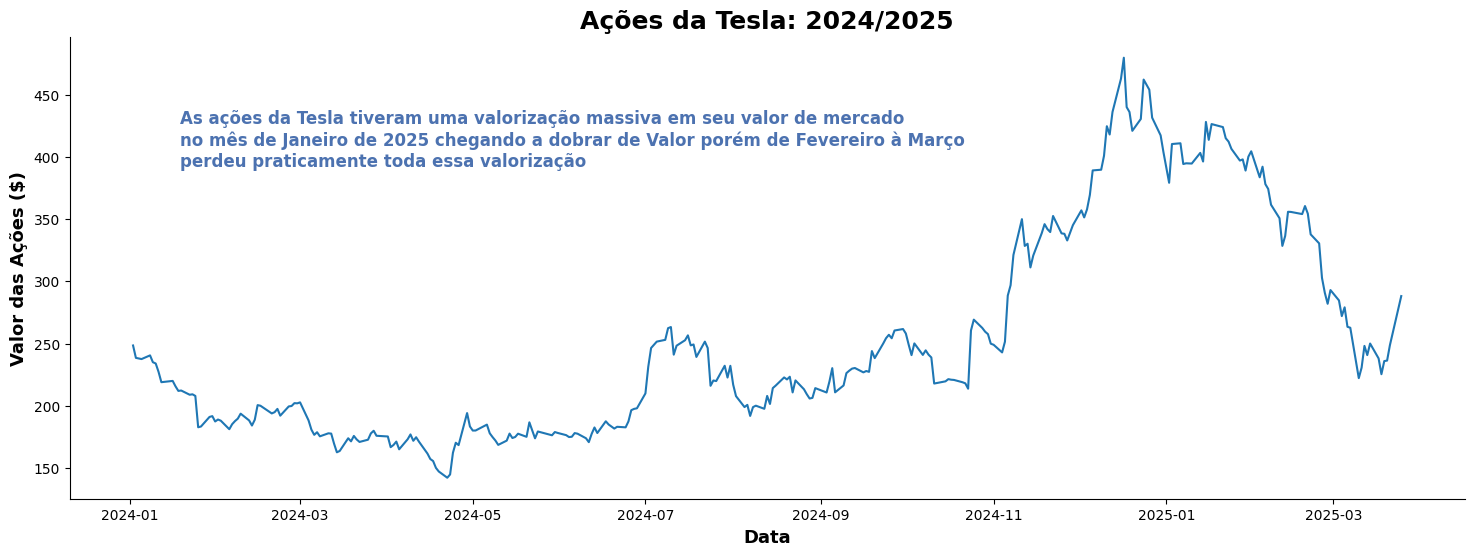

In [11]:
plt.figure(figsize=(18,6))
plt.plot(data_grafico.index, data_grafico["Close"])
plt.title("Ações da Tesla: 2024/2025", fontweight="bold", fontsize=18)
plt.xlabel("Data", fontweight="bold", fontsize=13)
plt.ylabel("Valor das Ações ($)", fontweight="bold", fontsize=13)
plt.annotate(text="As ações da Tesla tiveram uma valorização massiva em seu valor de mercado \
            \nno mês de Janeiro de 2025 chegando a dobrar de Valor porém de Fevereiro à Março \
            \nperdeu praticamente toda essa valorização", xy=(0.7, 0.2), xycoords="figure fraction",
             xytext=(0.1,0.65), fontsize=12, fontweight="bold", color="#4C72B0")
despine(right=True, top=True)
plt.show()

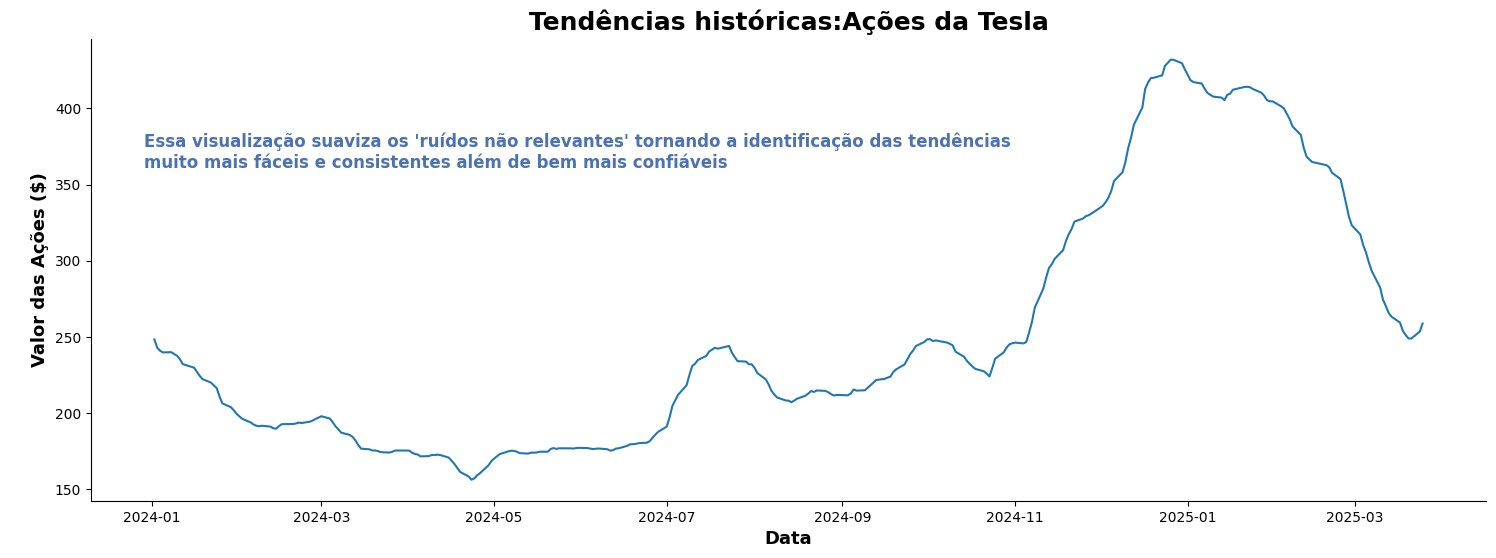

In [12]:
plt.figure(figsize=(18,6))
suavizacao = data_grafico[["Close"]].ewm(span=12, method="single").mean()
plt.plot(suavizacao)
plt.title("Tendências históricas:Ações da Tesla", fontweight="bold", fontsize=18)
plt.xlabel("Data", fontweight="bold", fontsize=13)
plt.ylabel("Valor das Ações ($)", fontweight="bold", fontsize=13)
plt.annotate(text="Essa visualização suaviza os 'ruídos não relevantes' tornando a identificação das tendências\
            \nmuito mais fáceis e consistentes além de bem mais confiáveis", xy=(0.7, 0.2), xycoords="figure fraction",
             xytext=(0.08,0.65), fontsize=12, fontweight="bold", color="#4C72B0")
despine(right=True, top=True)

In [13]:
data_volume = data_grafico.resample("MS")[["Volume"]].mean()
data_volume.head()

,Volume
Date,
2024-01-01,1.116088e+08
2024-02-01,1.009954e+08
2024-03-01,9.494521e+07
2024-04-01,1.126609e+08
2024-05-01,7.582640e+07


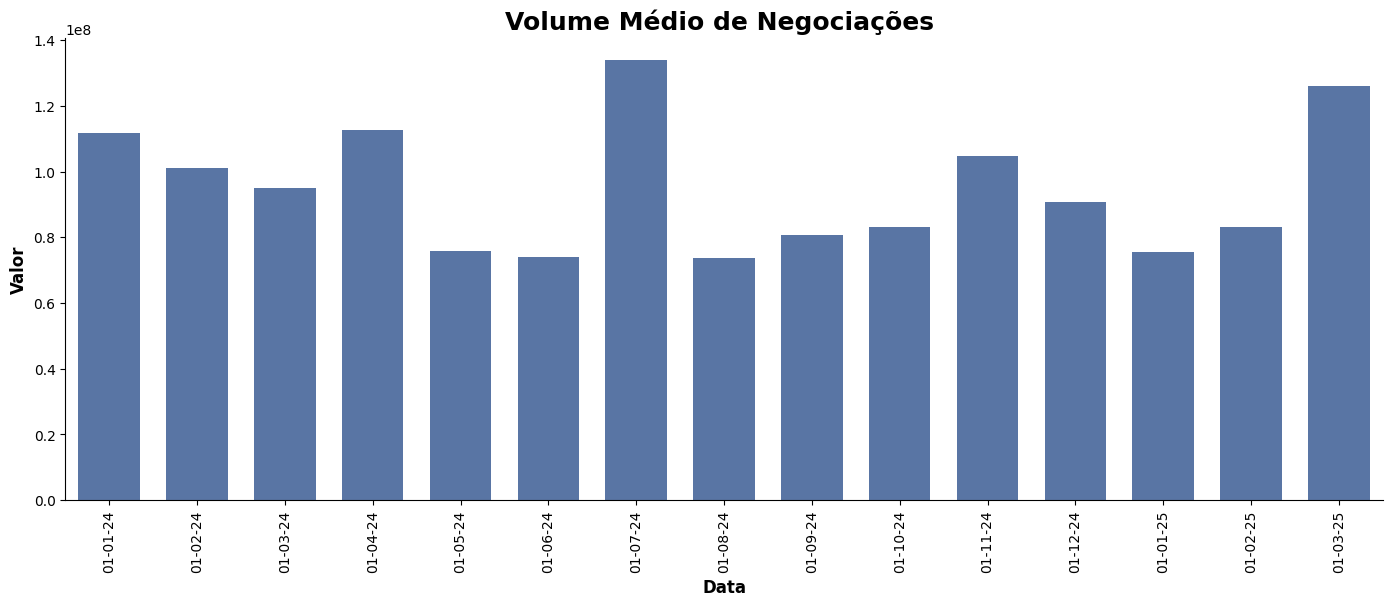

In [14]:
plt.figure(figsize=(17,6))
barplot(data=data_volume, x=data_volume.index.strftime("%d-%m-%y"), y=data_volume["Volume"], width=0.7, color="#4C72B0")
plt.title("Volume Médio de Negociações ", fontsize=18, fontweight="bold")
plt.xlabel("Data", fontsize=12, fontweight="bold")
plt.ylabel("Valor", fontsize=12, fontweight="bold")
plt.xticks(rotation=90)
despine(right=True, top=True)
plt.show()

## Preparação dos dados

In [15]:
data.shape

(809, 5)

In [16]:
ready_data = np.reshape(data["Close"], (-1,1))
ready_data[:10]

array([[399.92666626],
       [383.19665527],
       [362.70666504],
       [354.8999939 ],
       [342.32000732],
       [352.70666504],
       [354.79998779],
       [368.73999023],
       [343.85333252],
       [349.86999512]])

In [17]:
ready_data.shape

(809, 1)

In [18]:
scaler = MinMaxScaler(feature_range=(0.0,1.0))
scaler.fit(ready_data)
ready_data = scaler.transform(ready_data)
ready_data[:20]

array([[0.78498676],
       [0.73998458],
       [0.6848684 ],
       [0.66386917],
       [0.63003017],
       [0.65796932],
       [0.66360017],
       [0.70109748],
       [0.63415468],
       [0.65033894],
       [0.63321319],
       [0.60195648],
       [0.60251239],
       [0.55555557],
       [0.54309234],
       [0.53269136],
       [0.54973642],
       [0.45262179],
       [0.46808876],
       [0.54911771]])

In [19]:
#Função prepara dados vem do arquivo plots
X,y = prepara_dados(ready_data)

In [20]:
X.shape

(779, 30)

In [21]:
print(len(ready_data))
print(len(data))

809
809


In [22]:
data.shape[0]

809

In [23]:
# Função para separação dos dados para treino, teste e validação
def separa_dados(X, y):
    length_treino = int(len(data) * 0.75) # 75% para teste
    length_val = int(len(data) * 0.85)

    #Separação das variáveis independentes
    X_train = X[: length_treino] # Variáveis independentes treino
    X_val = X[length_treino: length_val] # Variáveis independentes validação
    X_test = X[length_val :]  # Variáveis independentes teste

    #Separação das variáveis dependentes
    y_train = y[: length_treino] # Variável dependente treino     
    y_val = y[length_treino: length_val] # Variável dependente validação
    y_test = y[length_val :]  # Variável dependente teste
    index_test = data.index[length_val :]
    
    return X_train, X_val, X_test, y_train, y_val, y_test, index_test[30:]
    
X_train, X_val, X_test, y_train, y_val, y_test, index_test = separa_dados(X,y)
X_train.shape

(606, 30)

Dimensões dos dados de Validação e teste após separação

In [24]:
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)
print(index_test.shape)

(81, 30)
(81,)
(92, 30)
(92,)
(92,)


In [25]:
index_test[-1]

Timestamp('2025-03-25 00:00:00')

In [26]:
#Redimensionamento dos dados para formato aceito pela rede neural
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_train.shape

(606, 30, 1)

## Rede Neural LSTM

In [27]:
modelo_lstm = Sequential()
modelo_lstm.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelo_lstm.add(Dropout(0.2))
modelo_lstm.add(LSTM(100, return_sequences=True))
modelo_lstm.add(Dropout(0.2))
modelo_lstm.add(LSTM(100, return_sequences=True))
modelo_lstm.add(Dropout(0.2))
modelo_lstm.add(LSTM(100, return_sequences=False))
modelo_lstm.add(Dropout(0.2))
modelo_lstm.add(Dense(1))

C:\Users\roni_\anaconda3\envs\ambiente_streamlit\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
modelo_lstm.compile(optimizer="adam", loss="mean_squared_error")
modelo_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,101 (1.08 MB)

 Trainable params: 282,101 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
es = EarlyStopping(monitor="val_loss", patience=40, restore_best_weights=True) #EarlyStopping para evitar overfitting
historico = modelo_lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=es)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 0.0352 - val_loss: 0.0036
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0074 - val_loss: 0.0037
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0065 - val_loss: 0.0048
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0070 - val_loss: 0.0034
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0052 - val_loss: 0.0040
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step

Text(0, 0.5, 'Loss')

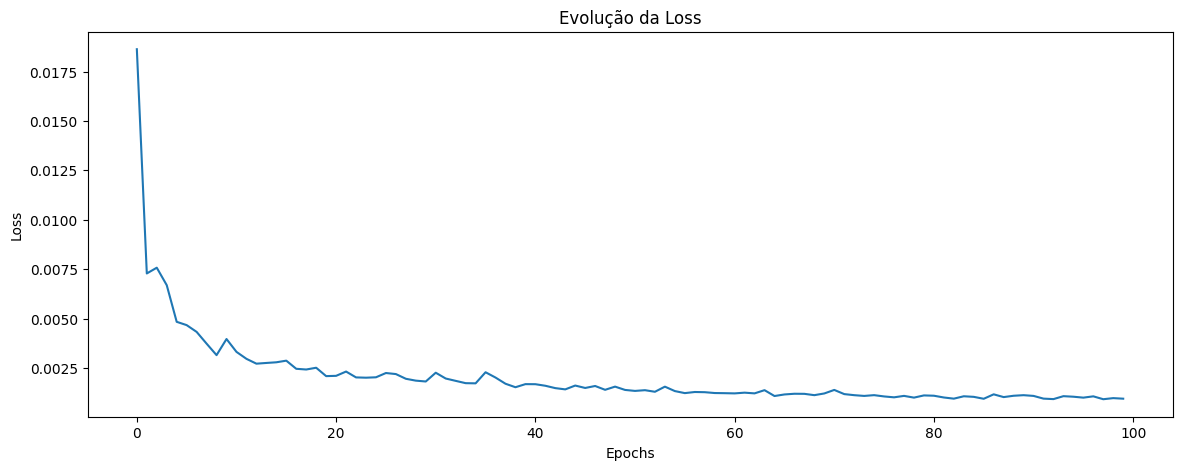

In [30]:
plt.figure(figsize=(14,5))
plt.plot(historico.history["loss"])
plt.title("Evolução da Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [31]:
y_pred_lstm = modelo_lstm.predict(X_test)
y_pred_lstm[:10]

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 433ms/step


array([[0.49783546],
       [0.5454803 ],
       [0.6126231 ],
       [0.57876176],
       [0.57144773],
       [0.54108423],
       [0.5561708 ],
       [0.6020369 ],
       [0.62239933],
       [0.6085077 ]], dtype=float32)

In [32]:
y_pred_lstm = np.reshape(y_pred_lstm, (-1,1))
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)

y_test = np.reshape(y_test, (-1,1))
y_test = scaler.inverse_transform(y_test)

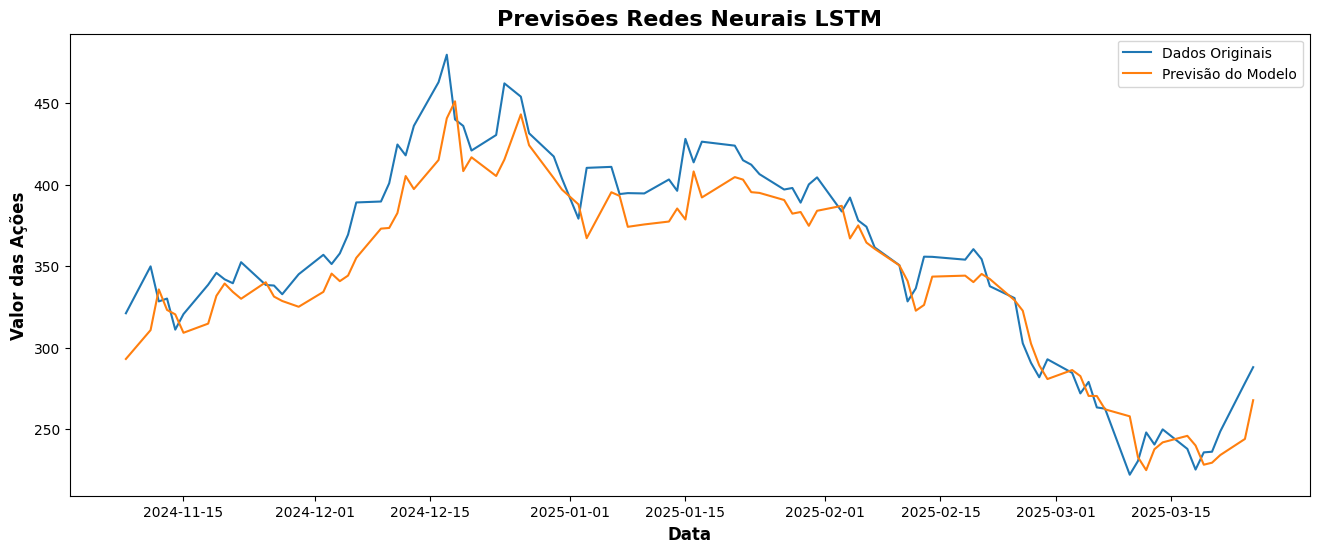

In [33]:
plt.figure(figsize=(16,6))
plt.plot(index_test, y_test, label="Dados Originais")
plt.plot(index_test, y_pred_lstm, label="Previsão do Modelo")
plt.title("Previsões Redes Neurais LSTM", fontsize=16, fontweight="bold")
plt.xlabel("Data", fontsize=12, fontweight="bold")
plt.ylabel("Valor das Ações", fontsize=12, fontweight="bold")
plt.legend()
plt.show()

In [34]:
modelo_lstm.save("Modelo_treinado_lstm.keras")

## Rede Neural CNN - GRU com "Teacher Forcing"

### Abordagem Atualizada

O modelo LSTM mostrou um bom desmepenho com os dados de treinamento porém ao utilizar os próprios dados do modelo para gerar previsões futuras um grande problema foi encontrado.
Esse problema tem à ver com o erro acumulado que é quando o modelo usa suas próprias previsões para gerar previsões futuras, para as quais, obviamente não temos dados de teste.
Por isso foi utilizada uma abordagem alternativa: 1) Redes Neurais Convolucionais que permite a extração de padrões locais e a modelagem de dependências temporais dos dados históricos.
2) Inicialmente, o modelo é treinado utilizando inputs reais para garantir que aprenda os padrões essenciais do comportamento do mercado.
3) Após a fase inicial, o modelo passa a incorporar suas próprias previsões como parte dos dados de entrada, permitindo que o modelo se saia melhor nas previsões quando estiver 'SOZINHO'.

In [70]:
#Estrutura da Rede Neural
# Modelo CNN-LSTM
modelo_cnn_lstm = Sequential()

# Camada CNN
modelo_cnn_lstm.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
modelo_cnn_lstm.add(MaxPooling1D(pool_size=2))
modelo_cnn_lstm.add(Dropout(0.2))

# Camadas LSTM
modelo_cnn_lstm.add(GRU(100, return_sequences=True))
modelo_cnn_lstm.add(Dropout(0.2))
modelo_cnn_lstm.add(GRU(100, return_sequences=True))
modelo_cnn_lstm.add(Dropout(0.2))
modelo_cnn_lstm.add(GRU(100, return_sequences=False))
modelo_cnn_lstm.add(Dropout(0.2))

# Camada densa final
modelo_cnn_lstm.add(Dense(1))

# Compilando o modelo
modelo_cnn_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Exibindo o resumo do modelo
modelo_cnn_lstm.summary()

C:\Users\roni_\anaconda3\envs\ambiente_streamlit\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 28, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 14, 100)        │        49,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 14, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 14, 100)        │        60,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 14, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 100)            │        60,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,357 (669.36 KB)

 Trainable params: 171,357 (669.36 KB)

 Non-trainable params: 0 (0.00 B)

Treinamento do Modelo GRU utilizando Redes Neurais Convolucionais para filtrar dados importantes e utilizando as próprias Previsões do Modelo para maior robustez do Modelo em prever dados futuros

In [71]:
def treinamento_iterativo(modelo, X_train, y_train, teacher_forcing_epochs, iterative_epochs, batch_size):
    # Fase 1: Treinamento com Teacher Forcing
    print("Iniciando a fase de Teacher Forcing...")
    modelo.fit(X_train, y_train, epochs=teacher_forcing_epochs, batch_size=batch_size, verbose=1)
    
    # Atualizando os dados de treinamento com as próprias previsões do modelo
    print("Atualizando as entradas iterativamente...")
    X_train_iterativo = np.copy(X_train)
    for i in range(X_train_iterativo.shape[0]):
        entrada_atual = X_train_iterativo[i].reshape(1, X_train_iterativo.shape[1], X_train_iterativo.shape[2])
        previsao = modelo.predict(entrada_atual)
        # Substituímos o último valor da janela pela previsão
        X_train_iterativo[i, -1, 0] = previsao[0, 0]
    
    # Fase 2: Treinamento iterativo com os dados atualizados
    print("Iniciando a fase iterativa de treinamento...")
    modelo.fit(X_train_iterativo, y_train, epochs=iterative_epochs, batch_size=batch_size, verbose=1)
    
    return modelo


# Aqui, o modelo é treinado epochs com dados reais o número de epochs é definido no parâmetro 'teacher_forcing_epochs' 
# Depois epochs com dados iterativamente atualizados é definido no parâmetro 'iterative_epochs'.
modelo_cnn_lstm = treinamento_iterativo(modelo_cnn_lstm, X_train, y_train, teacher_forcing_epochs=100, iterative_epochs=5, batch_size=32)


Iniciando a fase de Teacher Forcing...
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0488
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0082 
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0045 
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0037
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0042 
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0037
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0034 
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0029
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0028
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0029
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0027 
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0029
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0026
Epoch 15/100


In [72]:
y_pred = modelo_cnn_lstm.predict(X_test)
y_pred[:10]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step 


array([[0.4916603 ],
       [0.54046327],
       [0.59918016],
       [0.6240731 ],
       [0.5870193 ],
       [0.5703156 ],
       [0.5607466 ],
       [0.61082137],
       [0.61418736],
       [0.6315608 ]], dtype=float32)

In [73]:
y_pred = np.reshape(y_pred, (-1,1))
y_pred = scaler.inverse_transform(y_pred)

In [ ]:
plt.figure(figsize=(16,6)) #Plotagem do gráfico com pequeno ajuste nos índices para correta visualização
plt.plot(index_test[1:], y_test[:-1], label="Dados Originais")
plt.plot(index_test[1:], y_pred[1:], label="Previsão do Modelo")
plt.title("Previsões Redes Neurais CNN_LSTM", fontsize=16, fontweight="bold")
plt.xlabel("Data", fontsize=12, fontweight="bold")
plt.ylabel("Valor das Ações", fontsize=12, fontweight="bold")
plt.legend()
plt.show()

### Salvamento dos objetos que serão necessários na aplicação web

In [ ]:
previsoes_teste = pd.DataFrame({ "Valores Reais": y_test.flatten()[:-1], "Previsões": y_pred.flatten()[1:]}, index=index_test[1:])
previsoes_teste

In [ ]:
previsoes_teste.to_csv("dados_teste.csv")

In [ ]:
modelo_cnn_lstm.save("Modelo_treinado.keras")

In [ ]:
dump(scaler, "scaler.joblib")